In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from word2number import w2n
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("linear_reg_car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#plt.figure(figsize=(80,100))
#sns.pairplot(df)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


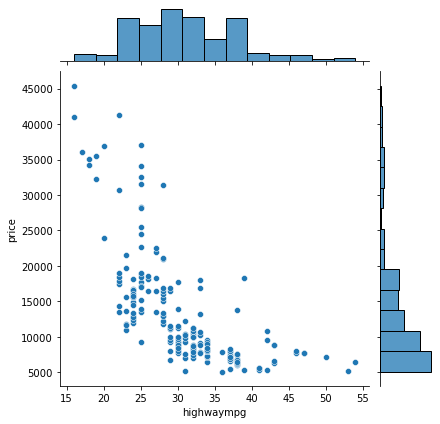

In [5]:
sns.jointplot(df.highwaympg,df.price)

In [6]:
df2=df.drop(['car_ID', 'symboling','enginetype','fuelsystem','boreratio','stroke','compressionratio','peakrpm',
             'citympg', 'highwaympg'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/3128115709.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df.drop(['car_ID', 'symboling','enginetype','fuelsystem','boreratio','stroke','compressionratio','peakrpm',


In [7]:
df2.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,102,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,115,17450.0


In [8]:
#CarName

In [9]:
df2.CarName=df2.CarName.apply(lambda x: x.strip())

In [10]:
len(df2.CarName.unique())

147

In [11]:
carname_stats=df2.groupby('CarName')['CarName'].count().sort_values(ascending=False)
carname_stats

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

In [12]:
len(carname_stats[carname_stats<4])

143

In [13]:
carname_lessthan_4=carname_stats[carname_stats<4]
carname_lessthan_4

CarName
toyota mark ii          3
mitsubishi outlander    3
mazda 626               3
mitsubishi mirage g4    3
mitsubishi g4           3
                       ..
honda prelude           1
honda civic 1500 gl     1
honda civic 1300        1
honda civic (auto)      1
vw rabbit               1
Name: CarName, Length: 143, dtype: int64

In [14]:
df2.CarName=df2.CarName.apply(lambda x: 'other' if x in carname_lessthan_4 else x)
df2.CarName.unique()

array(['other', 'peugeot 504', 'subaru dl', 'toyota corona',
       'toyota corolla'], dtype=object)

In [15]:
carname_dummy=pd.get_dummies(df2['CarName'],'columns')

In [16]:
carname_dummy

,columns_other,columns_peugeot 504,columns_subaru dl,columns_toyota corolla,columns_toyota corona
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
200,1,0,0,0,0
201,1,0,0,0,0
202,1,0,0,0,0
203,1,0,0,0,0


In [17]:
carname_dummy=carname_dummy.drop(['columns_peugeot 504'],'columns')
carname_dummy

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/1394874134.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  carname_dummy=carname_dummy.drop(['columns_peugeot 504'],'columns')


,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
200,1,0,0,0
201,1,0,0,0
202,1,0,0,0
203,1,0,0,0


In [18]:
df3=pd.concat([df2,carname_dummy],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/1069391838.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df3=pd.concat([df2,carname_dummy],'columns')


In [19]:
df3.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona
0,other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0
1,other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0
2,other,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,1,0,0,0


In [20]:
df3=df3.drop('CarName',axis=1)

In [21]:
df3.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,1,0,0,0


In [22]:
df3.isna().sum()

fueltype                  0
aspiration                0
doornumber                0
carbody                   0
drivewheel                0
enginelocation            0
wheelbase                 0
carlength                 0
carwidth                  0
carheight                 0
curbweight                0
cylindernumber            0
enginesize                0
horsepower                0
price                     0
columns_other             0
columns_subaru dl         0
columns_toyota corolla    0
columns_toyota corona     0
dtype: int64

In [23]:
#fueltype

In [24]:
df3.groupby('fueltype')['fueltype'].count()

fueltype
diesel     20
gas       185
Name: fueltype, dtype: int64

In [25]:
fueltype_dummy=pd.get_dummies(df3['fueltype'],'columns')

In [26]:
fueltype_dummy=fueltype_dummy.drop(['columns_diesel'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/2727900041.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fueltype_dummy=fueltype_dummy.drop(['columns_diesel'],'columns')


In [27]:
df4=pd.concat([df3,fueltype_dummy],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/994185688.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df4=pd.concat([df3,fueltype_dummy],'columns')


In [28]:
df4.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona,columns_gas
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0,1
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0,1
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,1,0,0,0,1


In [29]:
df4=df4.drop(['fueltype'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/296181317.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4=df4.drop(['fueltype'],'columns')


In [30]:
df4.head(2)

,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona,columns_gas
0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0,1
1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0,1


In [31]:
#aspiration

In [32]:
df4.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [33]:
asp_dummy=pd.get_dummies(df4['aspiration'],'columns')
asp_dummy=asp_dummy.drop(['columns_turbo'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/856358093.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  asp_dummy=asp_dummy.drop(['columns_turbo'],'columns')


In [34]:
asp_dummy[:3]

,columns_std
0,1
1,1
2,1


In [35]:
df5=pd.concat([df4,asp_dummy],'columns')
df5.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/113034875.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df5=pd.concat([df4,asp_dummy],'columns')


,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona,columns_gas,columns_std
0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0,1,1
1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0,1,1
2,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,1,0,0,0,1,1
3,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,102,13950.0,1,0,0,0,1,1
4,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,115,17450.0,1,0,0,0,1,1


In [36]:
df5=df5.drop(['aspiration'],'columns')
df5.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/988059893.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5=df5.drop(['aspiration'],'columns')


,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona,columns_gas,columns_std
0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,1,0,0,0,1,1
1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,1,0,0,0,1,1
2,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,1,0,0,0,1,1
3,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,102,13950.0,1,0,0,0,1,1
4,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,115,17450.0,1,0,0,0,1,1


In [37]:
#doornumber

In [38]:
df5.doornumber=df5.doornumber.apply(w2n.word_to_num)
df5.doornumber[:5]

0    2
1    2
2    2
3    4
4    4
Name: doornumber, dtype: int64

In [39]:
#carbody

In [40]:
df5.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [41]:
carbody_dummy=pd.get_dummies(df5['carbody'],'columns')
carbody_dummy=carbody_dummy.drop(['columns_wagon'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/834844507.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  carbody_dummy=carbody_dummy.drop(['columns_wagon'],'columns')


In [42]:
df6=pd.concat([df5,carbody_dummy],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/1126957987.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df6=pd.concat([df5,carbody_dummy],'columns')


In [43]:
df6=df6.drop(['carbody'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/3773418897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df6=df6.drop(['carbody'],'columns')


In [44]:
df6.head()

,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,columns_other,columns_subaru dl,columns_toyota corolla,columns_toyota corona,columns_gas,columns_std,columns_convertible,columns_hardtop,columns_hatchback,columns_sedan
0,2,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,...,1,0,0,0,1,1,1,0,0,0
1,2,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,...,1,0,0,0,1,1,1,0,0,0
2,2,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,...,1,0,0,0,1,1,0,0,1,0
3,4,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,...,1,0,0,0,1,1,0,0,0,1
4,4,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,...,1,0,0,0,1,1,0,0,0,1


In [45]:
#drivewheel

In [46]:
df6.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [47]:
drivewheel_dummy=pd.get_dummies(df6['drivewheel'],'columns')

In [48]:
drivewheel_dummy.columns

Index(['columns_4wd', 'columns_fwd', 'columns_rwd'], dtype='object')

In [49]:
drivewheel_dummy=drivewheel_dummy.drop(['columns_4wd'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/3223401658.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drivewheel_dummy=drivewheel_dummy.drop(['columns_4wd'],'columns')


In [50]:
df7=pd.concat([df6,drivewheel_dummy],'columns')
df7=df7.drop(['drivewheel'],'columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/4185755033.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df7=pd.concat([df6,drivewheel_dummy],'columns')
C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/4185755033.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df7=df7.drop(['drivewheel'],'columns')


In [51]:
df7.head(4)

,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,...,columns_toyota corolla,columns_toyota corona,columns_gas,columns_std,columns_convertible,columns_hardtop,columns_hatchback,columns_sedan,columns_fwd,columns_rwd
0,2,front,88.6,168.8,64.1,48.8,2548,four,130,111,...,0,0,1,1,1,0,0,0,0,1
1,2,front,88.6,168.8,64.1,48.8,2548,four,130,111,...,0,0,1,1,1,0,0,0,0,1
2,2,front,94.5,171.2,65.5,52.4,2823,six,152,154,...,0,0,1,1,0,0,1,0,0,1
3,4,front,99.8,176.6,66.2,54.3,2337,four,109,102,...,0,0,1,1,0,0,0,1,1,0


In [52]:
#enginelocation

In [53]:
df7.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [54]:
engineloc_dummy=pd.get_dummies(df7['enginelocation'],'columns')
engineloc_dummy=engineloc_dummy.drop('columns_rear','columns')

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/3563472153.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  engineloc_dummy=engineloc_dummy.drop('columns_rear','columns')


In [55]:
df8=pd.concat([df7,engineloc_dummy],'columns')
df8.head(4)

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/3638151891.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df8=pd.concat([df7,engineloc_dummy],'columns')


,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,...,columns_toyota corona,columns_gas,columns_std,columns_convertible,columns_hardtop,columns_hatchback,columns_sedan,columns_fwd,columns_rwd,columns_front
0,2,front,88.6,168.8,64.1,48.8,2548,four,130,111,...,0,1,1,1,0,0,0,0,1,1
1,2,front,88.6,168.8,64.1,48.8,2548,four,130,111,...,0,1,1,1,0,0,0,0,1,1
2,2,front,94.5,171.2,65.5,52.4,2823,six,152,154,...,0,1,1,0,0,1,0,0,1,1
3,4,front,99.8,176.6,66.2,54.3,2337,four,109,102,...,0,1,1,0,0,0,1,1,0,1


In [56]:
df8=df8.drop(['enginelocation'],'columns')
df8.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12224/1797793562.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df8=df8.drop(['enginelocation'],'columns')


,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,...,columns_toyota corona,columns_gas,columns_std,columns_convertible,columns_hardtop,columns_hatchback,columns_sedan,columns_fwd,columns_rwd,columns_front
0,2,88.6,168.8,64.1,48.8,2548,four,130,111,13495.0,...,0,1,1,1,0,0,0,0,1,1
1,2,88.6,168.8,64.1,48.8,2548,four,130,111,16500.0,...,0,1,1,1,0,0,0,0,1,1
2,2,94.5,171.2,65.5,52.4,2823,six,152,154,16500.0,...,0,1,1,0,0,1,0,0,1,1
3,4,99.8,176.6,66.2,54.3,2337,four,109,102,13950.0,...,0,1,1,0,0,0,1,1,0,1
4,4,99.4,176.6,66.4,54.3,2824,five,136,115,17450.0,...,0,1,1,0,0,0,1,0,0,1


In [57]:
#cylinder number

In [58]:
df8.cylindernumber=df8.cylindernumber.apply(w2n.word_to_num)

In [59]:
df8.cylindernumber[:5]

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [60]:
df8.columns

Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'horsepower', 'price',
       'columns_other', 'columns_subaru dl', 'columns_toyota corolla',
       'columns_toyota corona', 'columns_gas', 'columns_std',
       'columns_convertible', 'columns_hardtop', 'columns_hatchback',
       'columns_sedan', 'columns_fwd', 'columns_rwd', 'columns_front'],
      dtype='object')

In [61]:
df8.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,price,...,columns_toyota corona,columns_gas,columns_std,columns_convertible,columns_hardtop,columns_hatchback,columns_sedan,columns_fwd,columns_rwd,columns_front
0,2,88.6,168.8,64.1,48.8,2548,4,130,111,13495.0,...,0,1,1,1,0,0,0,0,1,1
1,2,88.6,168.8,64.1,48.8,2548,4,130,111,16500.0,...,0,1,1,1,0,0,0,0,1,1
2,2,94.5,171.2,65.5,52.4,2823,6,152,154,16500.0,...,0,1,1,0,0,1,0,0,1,1
3,4,99.8,176.6,66.2,54.3,2337,4,109,102,13950.0,...,0,1,1,0,0,0,1,1,0,1
4,4,99.4,176.6,66.4,54.3,2824,5,136,115,17450.0,...,0,1,1,0,0,0,1,0,0,1


In [62]:
#splitting a df

In [63]:
X=df8.drop(['price'],'columns')
X.shape

C:\Users\Admin\AppData\Local\Temp/ipykernel_10288/3711559269.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df8.drop(['price'],'columns')


(205, 22)

In [64]:
X.ndim

2

In [65]:
y=df8.price
y.shape

(205,)

In [66]:
y.ndim

1

In [67]:
#train test split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=56)

In [104]:
X.columns

Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'horsepower',
       'columns_other', 'columns_subaru dl', 'columns_toyota corolla',
       'columns_toyota corona', 'columns_gas', 'columns_std',
       'columns_convertible', 'columns_hardtop', 'columns_hatchback',
       'columns_sedan', 'columns_fwd', 'columns_rwd', 'columns_front'],
      dtype='object')

In [105]:
type(X['carlength'])

pandas.core.series.Series

In [106]:
sc=StandardScaler()

In [107]:
X_train=sc.fit_transform(X_train)

In [108]:
X_test=sc.transform(X_test)

In [109]:
linear_model=LinearRegression()

In [110]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [111]:
linear_model.score(X_test,y_test)

0.9049060676916497

In [112]:
linear_model.predict(X_test)[:5]

array([29395.96660495, 20277.62818334, 15248.01883261, 13327.43742971,
        6226.39090711])

In [113]:
y_test[:5]

17     36880.0
101    13499.0
191    13295.0
171    11549.0
45      8916.5
Name: price, dtype: float64